# Inteligência Artificial: Classificação
## Teste de Performance - TP2

### Questão 1
Carregue o dataset disponível em "https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv" para um dataframe para um dataframe utilizando linguagem Python e execute as seguintes transformações:
- Elimine as variáveis `'PassengerId'`,`'Name'`,`'Ticket'` e `'Cabin'`.
- Elimine observações que contenham dados ausentes (NA).
- Aplique o LabelEncoder nas variáveis `'Embarked'` e `'Sex'`.
- Separe o dataframe resultante em Treino-Teste, utilizando a proporção 75-25%.
- A partir do dataframe totalmente transformado, aplique um modelo SVM utilizando um Kernel linear.


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Importar os dados
dataset = pd.read_csv("https://raw.githubusercontent.com/cassiusf/datasets/refs/heads/main/titanic_data.csv")

# Elimine as variáveis "PassengerId", "Name", "Ticket" e "Cabin":
eliminar = ["PassengerId", "Name", "Ticket", "Cabin"]
dataset = dataset.drop(columns=eliminar)

# Elimine observações que contenham dados ausentes (NA):
dataset = dataset.dropna()

# Aplique o LabelEncoder nas variáveis "Embarked" e "Sex":
label_encoder = LabelEncoder()
dataset["Embarked"] = label_encoder.fit_transform(dataset["Embarked"])
dataset["Sex"] = label_encoder.fit_transform(dataset["Sex"])

# Separe o dataframe resultante em Treino-Teste, utilizando a proporção 75-25%:
RANDOM_STATE = 11
TEST_SIZE = 0.25
features = dataset.drop(columns=["Survived"]) # todas as colunas, exceto a variável dependente
target = dataset["Survived"] # variável dependente (variável que se quer prever)
target_labels = target.unique() # classes da variável dependente
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# A partir do dataframe totalmente transformado, aplique um modelo SVM utilizando um Kernel linear:
svm = SVC(kernel='linear', random_state=RANDOM_STATE)
svm.fit(feature_train, target_train)
target_pred_linear = svm.predict(feature_test)
print("Predições com Kernel linear:", target_pred_linear)

Predições com Kernel linear: [1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1
 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1]


### Questão 2
Apresente a matriz de confusão resultante do processo de treinamento.
- Apresente as métricas acurácia, precision, recall e F1-score deste modelo.


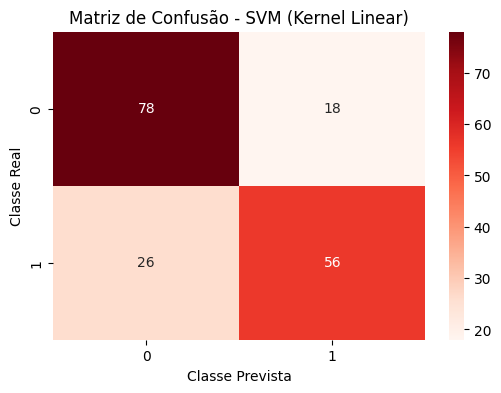

Acurácia (linear): 0.753
Precision (linear): 0.753
Recall (linear): 0.753
F1-score (linear): 0.751


In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


# Apresente a matriz de confusão resultante do processo de treinamento:
cm = confusion_matrix(target_test, target_pred_linear)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão - SVM (Kernel Linear)")
plt.show()

# Apresente as métricas acurácia, precision, recall e F1-score deste modelo:
accuracy_linear = accuracy_score(target_test, target_pred_linear)
precision_linear = precision_score(target_test, target_pred_linear, average='weighted')
recall_linear = recall_score(target_test, target_pred_linear, average='weighted')
f1_linear = f1_score(target_test, target_pred_linear, average='weighted')
print(f"Acurácia (linear): {accuracy_linear:.3f}")
print(f"Precision (linear): {precision_linear:.3f}")
print(f"Recall (linear): {recall_linear:.3f}")
print(f"F1-score (linear): {f1_linear:.3f}")

### Questão 3
Execute o mesmo modelo, agora utilizando dois núcleos diferentes, o rbf e o sigmoid. 
- Apresente a matriz de confusão resultante do processo de treinamento.
- Apresente as métricas acurácia, precision, recall e F1-score deste modelo.


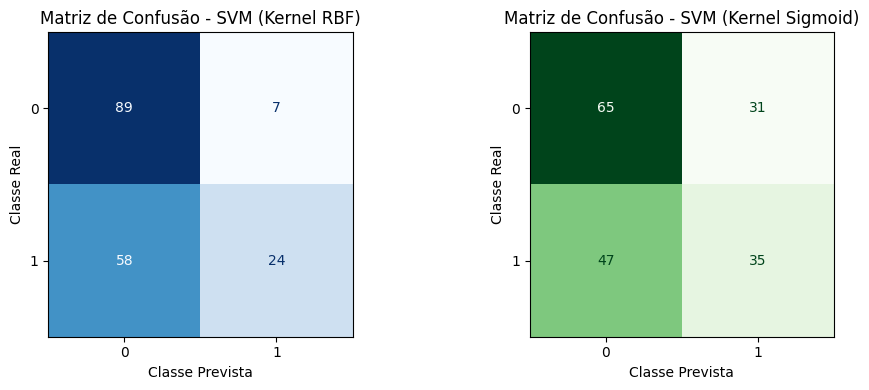

Acurácia (RBF): 0.635
Precision (RBF): 0.683
Recall (RBF): 0.635
F1-score (RBF): 0.591

Acurácia (sigmoid): 0.562
Precision (sigmoid): 0.557
Recall (sigmoid): 0.562
F1-score (sigmoid): 0.555


In [3]:
from sklearn.metrics import ConfusionMatrixDisplay

# Execute o mesmo modelo, agora utilizando dois núcleos diferentes, o rbf e o sigmoid:
svm_rbf = SVC(kernel='rbf', random_state=RANDOM_STATE)
svm_rbf.fit(feature_train, target_train)
target_pred_rbf = svm_rbf.predict(feature_test)

svm_sigmoid = SVC(kernel='sigmoid', random_state=RANDOM_STATE)
svm_sigmoid.fit(feature_train, target_train)
target_pred_sigmoid = svm_sigmoid.predict(feature_test)


# Apresente a matriz de confusão resultante do processo de treinamento:
cm_rbf = confusion_matrix(target_test, target_pred_rbf)
cm_sigmoid = confusion_matrix(target_test, target_pred_sigmoid)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Matriz para RBF
disp_rbf = ConfusionMatrixDisplay(cm_rbf, display_labels=target_labels)
disp_rbf.plot(ax=axes[0], cmap="Blues", colorbar=False)
axes[0].set_xlabel("Classe Prevista")
axes[0].set_ylabel("Classe Real")
axes[0].set_title("Matriz de Confusão - SVM (Kernel RBF)")

# Matriz para Sigmoid
disp_sigmoid = ConfusionMatrixDisplay(cm_sigmoid, display_labels=target_labels)
disp_sigmoid.plot(ax=axes[1], cmap="Greens", colorbar=False)
axes[1].set_xlabel("Classe Prevista")
axes[1].set_ylabel("Classe Real")
axes[1].set_title("Matriz de Confusão - SVM (Kernel Sigmoid)")
plt.tight_layout()
plt.show()

# Apresente as métricas acurácia, precision, recall e F1-score deste modelo:
accuracy_rbf = accuracy_score(target_test, target_pred_rbf)
precision_rbf = precision_score(target_test, target_pred_rbf, average='weighted')
recall_rbf = recall_score(target_test, target_pred_rbf, average='weighted')
f1_rbf = f1_score(target_test, target_pred_rbf, average='weighted')
print(f"Acurácia (RBF): {accuracy_rbf:.3f}")
print(f"Precision (RBF): {precision_rbf:.3f}")
print(f"Recall (RBF): {recall_rbf:.3f}")
print(f"F1-score (RBF): {f1_rbf:.3f}")

accuracy_sigmoid = accuracy_score(target_test, target_pred_sigmoid)
precision_sigmoid = precision_score(target_test, target_pred_sigmoid, average='weighted')
recall_sigmoid = recall_score(target_test, target_pred_sigmoid, average='weighted')
f1_sigmoid = f1_score(target_test, target_pred_sigmoid, average='weighted')
print(f"\nAcurácia (sigmoid): {accuracy_sigmoid:.3f}")
print(f"Precision (sigmoid): {precision_sigmoid:.3f}")
print(f"Recall (sigmoid): {recall_sigmoid:.3f}")
print(f"F1-score (sigmoid): {f1_sigmoid:.3f}")
